# Jupyter Notebook for Querying MISP Instance

### Connecting to the API

- Replace `misp_url` with the IP address of the current MISP instance
- Replace `misp_key` with your API AuthKey
- Need to disable SSL cert verification (currently)

In [3]:
from pymisp import PyMISP
from pprint import pprint
import matplotlib_inline
import pandas as pd
from config import config

# create misp instance
MISP_URL = config.MISP_URL
MISP_KEY = config.MISP_KEY
MISP_VERIFYCERT = config.MISP_VERIFYCERT
misp = PyMISP(MISP_URL, MISP_KEY, MISP_VERIFYCERT, debug=False)


PyMISPError: Unable to connect to MISP (https://52.49.25.50). Please make sure the API key and the URL are correct (http/https is required): HTTPSConnectionPool(host='52.49.25.50', port=443): Max retries exceeded with url: /servers/getVersion (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))

### Search for IOCs that are in the MISP database

- Replace `IOC` with domain, IP, hash, filename, etc.
- Returns the MISP Event the Attribute (IOC) is associated with
- You can pull information from this Event (e.g. enriched threat intelligence)

In [23]:
# searching for attributes (IOCs)
IOC = "oxcdntech.com"
res = misp.search(value=IOC)

if res:
    print("--- Matching Event ---")
    print(f"Event ID: {res[0]['Event']['id']}")
    print(f"Event Info: {res[0]['Event']['info']}")
    print(f"Date Added: {res[0]['Event']['date']}")
    print(f"Tags: {res[0]['Event']['date']}")
    for tag in res[0]['Event']['Tag']:
        print(f"- {tag['name']}")
    print("-" * 20)

else:
    print(f"The IOC {IOC} is not in MISP")

--- Matching Event ---
Event ID: 8
Event Info: Earth Estries Targets Government, Tech for Cyberespionage
Date Added: 2023-09-04
Tags: 2023-09-04
- cssa:sharing-class="unvetted"
- cssa:report="link"
- cssa:origin="report"
- tlp:clear
--------------------


/Users/adam.goss/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host '3.249.168.138'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


### Finding the most commont TTPS

- Searches across all Events and counts TTPs to return the most common ones
- Plots the TTPs in a bar graph

/Users/adam.goss/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host '34.244.162.14'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Axes: >

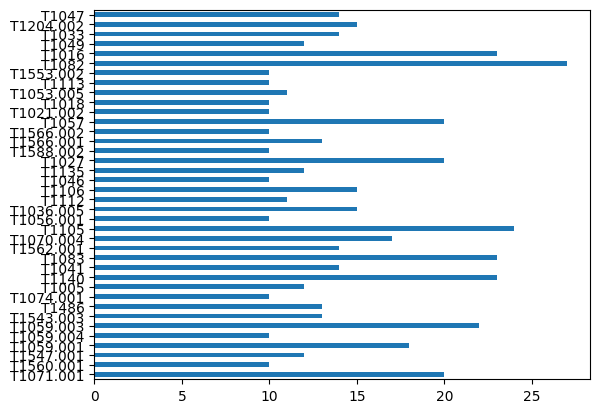

In [2]:
# finding most common TTPs across all events
# get all events in MISP instance
all = misp.search(controller="events")
# create dictionary containing MITRE ATT&CK TTPs mapped to a count
ttps = {
    "T1548" : 0,
    "T1548.002" : 0,
    "T1548.004" : 0,
    "T1548.001" : 0,
    "T1548.003" : 0,
    "T1134" : 0,
    "T1134.002" : 0,
    "T1134.003" : 0,
    "T1134.004" : 0,
    "T1134.005" : 0,
    "T1134.001" : 0,
    "T1531" : 0,
    "T1087" : 0,
    "T1087.004" : 0,
    "T1087.002" : 0,
    "T1087.003" : 0,
    "T1087.001" : 0,
    "T1098" : 0,
    "T1098.001" : 0,
    "T1098.003" : 0,
    "T1098.002" : 0,
    "T1098.005" : 0,
    "T1098.004" : 0,
    "T1650" : 0,
    "T1583" : 0,
    "T1583.005" : 0,
    "T1583.002" : 0,
    "T1583.001" : 0,
    "T1583.008" : 0,
    "T1583.004" : 0,
    "T1583.007" : 0,
    "T1583.003" : 0,
    "T1583.006" : 0,
    "T1595" : 0,
    "T1595.001" : 0,
    "T1595.002" : 0,
    "T1595.003" : 0,
    "T1557" : 0,
    "T1557.002" : 0,
    "T1557.003" : 0,
    "T1557.001" : 0,
    "T1071" : 0,
    "T1071.004" : 0,
    "T1071.002" : 0,
    "T1071.003" : 0,
    "T1071.001" : 0,
    "T1010" : 0,
    "T1560" : 0,
    "T1560.003" : 0,
    "T1560.002" : 0,
    "T1560.001" : 0,
    "T1123" : 0,
    "T1119" : 0,
    "T1020" : 0,
    "T1020.001" : 0,
    "T1197" : 0,
    "T1547" : 0,
    "T1547.014" : 0,
    "T1547.002" : 0,
    "T1547.006" : 0,
    "T1547.008" : 0,
    "T1547.015" : 0,
    "T1547.010" : 0,
    "T1547.012" : 0,
    "T1547.007" : 0,
    "T1547.001" : 0,
    "T1547.005" : 0,
    "T1547.009" : 0,
    "T1547.003" : 0,
    "T1547.004" : 0,
    "T1547.013" : 0,
    "T1037" : 0,
    "T1037.002" : 0,
    "T1037.001" : 0,
    "T1037.003" : 0,
    "T1037.004" : 0,
    "T1037.005" : 0,
    "T1176" : 0,
    "T1217" : 0,
    "T1185" : 0,
    "T1110" : 0,
    "T1110.004" : 0,
    "T1110.002" : 0,
    "T1110.001" : 0,
    "T1110.003" : 0,
    "T1612" : 0,
    "T1115" : 0,
    "T1651" : 0,
    "T1580" : 0,
    "T1538" : 0,
    "T1526" : 0,
    "T1619" : 0,
    "T1059" : 0,
    "T1059.002" : 0,
    "T1059.009" : 0,
    "T1059.007" : 0,
    "T1059.008" : 0,
    "T1059.001" : 0,
    "T1059.006" : 0,
    "T1059.004" : 0,
    "T1059.005" : 0,
    "T1059.003" : 0,
    "T1092" : 0,
    "T1586" : 0,
    "T1586.003" : 0,
    "T1586.002" : 0,
    "T1586.001" : 0,
    "T1554" : 0,
    "T1584" : 0,
    "T1584.005" : 0,
    "T1584.002" : 0,
    "T1584.001" : 0,
    "T1584.004" : 0,
    "T1584.007" : 0,
    "T1584.003" : 0,
    "T1584.006" : 0,
    "T1609" : 0,
    "T1613" : 0,
    "T1136" : 0,
    "T1136.003" : 0,
    "T1136.002" : 0,
    "T1136.001" : 0,
    "T1543" : 0,
    "T1543.001" : 0,
    "T1543.004" : 0,
    "T1543.002" : 0,
    "T1543.003" : 0,
    "T1555" : 0,
    "T1555.003" : 0,
    "T1555.001" : 0,
    "T1555.005" : 0,
    "T1555.002" : 0,
    "T1555.004" : 0,
    "T1485" : 0,
    "T1132" : 0,
    "T1132.002" : 0,
    "T1132.001" : 0,
    "T1486" : 0,
    "T1565" : 0,
    "T1565.003" : 0,
    "T1565.001" : 0,
    "T1565.002" : 0,
    "T1001" : 0,
    "T1001.001" : 0,
    "T1001.003" : 0,
    "T1001.002" : 0,
    "T1074" : 0,
    "T1074.001" : 0,
    "T1074.002" : 0,
    "T1030" : 0,
    "T1530" : 0,
    "T1602" : 0,
    "T1602.002" : 0,
    "T1602.001" : 0,
    "T1213" : 0,
    "T1213.003" : 0,
    "T1213.001" : 0,
    "T1213.002" : 0,
    "T1005" : 0,
    "T1039" : 0,
    "T1025" : 0,
    "T1622" : 0,
    "T1491" : 0,
    "T1491.002" : 0,
    "T1491.001" : 0,
    "T1140" : 0,
    "T1610" : 0,
    "T1587" : 0,
    "T1587.002" : 0,
    "T1587.003" : 0,
    "T1587.004" : 0,
    "T1587.001" : 0,
    "T1652" : 0,
    "T1006" : 0,
    "T1561" : 0,
    "T1561.001" : 0,
    "T1561.002" : 0,
    "T1484" : 0,
    "T1484.002" : 0,
    "T1484.001" : 0,
    "T1482" : 0,
    "T1189" : 0,
    "T1568" : 0,
    "T1568.003" : 0,
    "T1568.002" : 0,
    "T1568.001" : 0,
    "T1114" : 0,
    "T1114.003" : 0,
    "T1114.001" : 0,
    "T1114.002" : 0,
    "T1573" : 0,
    "T1573.002" : 0,
    "T1573.001" : 0,
    "T1499" : 0,
    "T1499.003" : 0,
    "T1499.004" : 0,
    "T1499.001" : 0,
    "T1499.002" : 0,
    "T1611" : 0,
    "T1585" : 0,
    "T1585.003" : 0,
    "T1585.002" : 0,
    "T1585.001" : 0,
    "T1546" : 0,
    "T1546.008" : 0,
    "T1546.009" : 0,
    "T1546.010" : 0,
    "T1546.011" : 0,
    "T1546.001" : 0,
    "T1546.015" : 0,
    "T1546.014" : 0,
    "T1546.012" : 0,
    "T1546.016" : 0,
    "T1546.006" : 0,
    "T1546.007" : 0,
    "T1546.013" : 0,
    "T1546.002" : 0,
    "T1546.005" : 0,
    "T1546.004" : 0,
    "T1546.003" : 0,
    "T1480" : 0,
    "T1480.001" : 0,
    "T1048" : 0,
    "T1048.002" : 0,
    "T1048.001" : 0,
    "T1048.003" : 0,
    "T1041" : 0,
    "T1011" : 0,
    "T1011.001" : 0,
    "T1052" : 0,
    "T1052.001" : 0,
    "T1567" : 0,
    "T1567.002" : 0,
    "T1567.001" : 0,
    "T1567.003" : 0,
    "T1190" : 0,
    "T1203" : 0,
    "T1212" : 0,
    "T1211" : 0,
    "T1068" : 0,
    "T1210" : 0,
    "T1133" : 0,
    "T1008" : 0,
    "T1083" : 0,
    "T1222" : 0,
    "T1222.002" : 0,
    "T1222.001" : 0,
    "T1495" : 0,
    "T1187" : 0,
    "T1606" : 0,
    "T1606.002" : 0,
    "T1606.001" : 0,
    "T1592" : 0,
    "T1592.004" : 0,
    "T1592.003" : 0,
    "T1592.001" : 0,
    "T1592.002" : 0,
    "T1589" : 0,
    "T1589.001" : 0,
    "T1589.002" : 0,
    "T1589.003" : 0,
    "T1590" : 0,
    "T1590.002" : 0,
    "T1590.001" : 0,
    "T1590.005" : 0,
    "T1590.006" : 0,
    "T1590.004" : 0,
    "T1590.003" : 0,
    "T1591" : 0,
    "T1591.002" : 0,
    "T1591.001" : 0,
    "T1591.003" : 0,
    "T1591.004" : 0,
    "T1615" : 0,
    "T1200" : 0,
    "T1564" : 0,
    "T1564.008" : 0,
    "T1564.005" : 0,
    "T1564.001" : 0,
    "T1564.002" : 0,
    "T1564.003" : 0,
    "T1564.004" : 0,
    "T1564.010" : 0,
    "T1564.009" : 0,
    "T1564.006" : 0,
    "T1564.007" : 0,
    "T1574" : 0,
    "T1574.012" : 0,
    "T1574.001" : 0,
    "T1574.002" : 0,
    "T1574.004" : 0,
    "T1574.006" : 0,
    "T1574.005" : 0,
    "T1574.013" : 0,
    "T1574.007" : 0,
    "T1574.008" : 0,
    "T1574.009" : 0,
    "T1574.010" : 0,
    "T1574.011" : 0,
    "T1562" : 0,
    "T1562.008" : 0,
    "T1562.002" : 0,
    "T1562.007" : 0,
    "T1562.004" : 0,
    "T1562.001" : 0,
    "T1562.010" : 0,
    "T1562.003" : 0,
    "T1562.006" : 0,
    "T1562.009" : 0,
    "T1562.011" : 0,
    "T1525" : 0,
    "T1070" : 0,
    "T1070.003" : 0,
    "T1070.002" : 0,
    "T1070.008" : 0,
    "T1070.007" : 0,
    "T1070.009" : 0,
    "T1070.001" : 0,
    "T1070.004" : 0,
    "T1070.005" : 0,
    "T1070.006" : 0,
    "T1202" : 0,
    "T1105" : 0,
    "T1490" : 0,
    "T1056" : 0,
    "T1056.004" : 0,
    "T1056.002" : 0,
    "T1056.001" : 0,
    "T1056.003" : 0,
    "T1559" : 0,
    "T1559.001" : 0,
    "T1559.002" : 0,
    "T1559.003" : 0,
    "T1534" : 0,
    "T1570" : 0,
    "T1036" : 0,
    "T1036.007" : 0,
    "T1036.001" : 0,
    "T1036.008" : 0,
    "T1036.004" : 0,
    "T1036.005" : 0,
    "T1036.003" : 0,
    "T1036.002" : 0,
    "T1036.006" : 0,
    "T1556" : 0,
    "T1556.001" : 0,
    "T1556.007" : 0,
    "T1556.006" : 0,
    "T1556.004" : 0,
    "T1556.008" : 0,
    "T1556.002" : 0,
    "T1556.003" : 0,
    "T1556.005" : 0,
    "T1578" : 0,
    "T1578.002" : 0,
    "T1578.001" : 0,
    "T1578.003" : 0,
    "T1578.004" : 0,
    "T1112" : 0,
    "T1601" : 0,
    "T1601.002" : 0,
    "T1601.001" : 0,
    "T1111" : 0,
    "T1621" : 0,
    "T1104" : 0,
    "T1106" : 0,
    "T1599" : 0,
    "T1599.001" : 0,
    "T1498" : 0,
    "T1498.001" : 0,
    "T1498.002" : 0,
    "T1046" : 0,
    "T1135" : 0,
    "T1040" : 0,
    "T1095" : 0,
    "T1571" : 0,
    "T1003" : 0,
    "T1003.008" : 0,
    "T1003.005" : 0,
    "T1003.006" : 0,
    "T1003.004" : 0,
    "T1003.001" : 0,
    "T1003.003" : 0,
    "T1003.007" : 0,
    "T1003.002" : 0,
    "T1027" : 0,
    "T1027.001" : 0,
    "T1027.010" : 0,
    "T1027.004" : 0,
    "T1027.007" : 0,
    "T1027.009" : 0,
    "T1027.011" : 0,
    "T1027.006" : 0,
    "T1027.005" : 0,
    "T1027.002" : 0,
    "T1027.003" : 0,
    "T1027.008" : 0,
    "T1588" : 0,
    "T1588.003" : 0,
    "T1588.004" : 0,
    "T1588.005" : 0,
    "T1588.001" : 0,
    "T1588.002" : 0,
    "T1588.006" : 0,
    "T1137" : 0,
    "T1137.006" : 0,
    "T1137.001" : 0,
    "T1137.002" : 0,
    "T1137.003" : 0,
    "T1137.004" : 0,
    "T1137.005" : 0,
    "T1201" : 0,
    "T1120" : 0,
    "T1069" : 0,
    "T1069.003" : 0,
    "T1069.002" : 0,
    "T1069.001" : 0,
    "T1566" : 0,
    "T1598" : 0,
    "T1598.002" : 0,
    "T1598.003" : 0,
    "T1598.001" : 0,
    "T1566.001" : 0,
    "T1566.002" : 0,
    "T1566.003" : 0,
    "T1647" : 0,
    "T1542" : 0,
    "T1542.003" : 0,
    "T1542.002" : 0,
    "T1542.004" : 0,
    "T1542.001" : 0,
    "T1542.005" : 0,
    "T1057" : 0,
    "T1055" : 0,
    "T1055.004" : 0,
    "T1055.001" : 0,
    "T1055.011" : 0,
    "T1055.015" : 0,
    "T1055.002" : 0,
    "T1055.009" : 0,
    "T1055.013" : 0,
    "T1055.012" : 0,
    "T1055.008" : 0,
    "T1055.003" : 0,
    "T1055.005" : 0,
    "T1055.014" : 0,
    "T1572" : 0,
    "T1090" : 0,
    "T1090.004" : 0,
    "T1090.002" : 0,
    "T1090.001" : 0,
    "T1090.003" : 0,
    "T1012" : 0,
    "T1620" : 0,
    "T1219" : 0,
    "T1563" : 0,
    "T1563.002" : 0,
    "T1563.001" : 0,
    "T1021" : 0,
    "T1021.007" : 0,
    "T1021.003" : 0,
    "T1021.001" : 0,
    "T1021.002" : 0,
    "T1021.004" : 0,
    "T1021.005" : 0,
    "T1021.006" : 0,
    "T1018" : 0,
    "T1091" : 0,
    "T1496" : 0,
    "T1207" : 0,
    "T1014" : 0,
    "T1053" : 0,
    "T1053.002" : 0,
    "T1053.007" : 0,
    "T1053.003" : 0,
    "T1053.005" : 0,
    "T1053.006" : 0,
    "T1029" : 0,
    "T1113" : 0,
    "T1597" : 0,
    "T1597.002" : 0,
    "T1597.001" : 0,
    "T1596" : 0,
    "T1596.004" : 0,
    "T1596.001" : 0,
    "T1596.003" : 0,
    "T1596.005" : 0,
    "T1596.002" : 0,
    "T1593" : 0,
    "T1593.003" : 0,
    "T1593.002" : 0,
    "T1593.001" : 0,
    "T1594" : 0,
    "T1505" : 0,
    "T1505.004" : 0,
    "T1505.001" : 0,
    "T1505.005" : 0,
    "T1505.002" : 0,
    "T1505.003" : 0,
    "T1648" : 0,
    "T1489" : 0,
    "T1129" : 0,
    "T1072" : 0,
    "T1518" : 0,
    "T1518.001" : 0,
    "T1608" : 0,
    "T1608.004" : 0,
    "T1608.003" : 0,
    "T1608.005" : 0,
    "T1608.006" : 0,
    "T1608.001" : 0,
    "T1608.002" : 0,
    "T1528" : 0,
    "T1539" : 0,
    "T1649" : 0,
    "T1558" : 0,
    "T1558.004" : 0,
    "T1558.001" : 0,
    "T1558.003" : 0,
    "T1558.002" : 0,
    "T1553" : 0,
    "T1553.002" : 0,
    "T1553.006" : 0,
    "T1553.001" : 0,
    "T1553.004" : 0,
    "T1553.005" : 0,
    "T1553.003" : 0,
    "T1195" : 0,
    "T1195.003" : 0,
    "T1195.001" : 0,
    "T1195.002" : 0,
    "T1218" : 0,
    "T1218.003" : 0,
    "T1218.001" : 0,
    "T1218.002" : 0,
    "T1218.004" : 0,
    "T1218.014" : 0,
    "T1218.013" : 0,
    "T1218.005" : 0,
    "T1218.007" : 0,
    "T1218.008" : 0,
    "T1218.009" : 0,
    "T1218.010" : 0,
    "T1218.011" : 0,
    "T1218.012" : 0,
    "T1082" : 0,
    "T1614" : 0,
    "T1614.001" : 0,
    "T1016" : 0,
    "T1016.001" : 0,
    "T1049" : 0,
    "T1033" : 0,
    "T1216" : 0,
    "T1216.001" : 0,
    "T1007" : 0,
    "T1569" : 0,
    "T1569.001" : 0,
    "T1569.002" : 0,
    "T1529" : 0,
    "T1124" : 0,
    "T1080" : 0,
    "T1221" : 0,
    "T1205" : 0,
    "T1205.001" : 0,
    "T1205.002" : 0,
    "T1537" : 0,
    "T1127" : 0,
    "T1127.001" : 0,
    "T1199" : 0,
    "T1552" : 0,
    "T1552.003" : 0,
    "T1552.008" : 0,
    "T1552.005" : 0,
    "T1552.007" : 0,
    "T1552.001" : 0,
    "T1552.002" : 0,
    "T1552.006" : 0,
    "T1552.004" : 0,
    "T1535" : 0,
    "T1550" : 0,
    "T1550.001" : 0,
    "T1550.002" : 0,
    "T1550.003" : 0,
    "T1550.004" : 0,
    "T1204" : 0,
    "T1204.002" : 0,
    "T1204.003" : 0,
    "T1204.001" : 0,
    "T1078" : 0,
    "T1078.004" : 0,
    "T1078.001" : 0,
    "T1078.002" : 0,
    "T1078.003" : 0,
    "T1125" : 0,
    "T1497" : 0,
    "T1497.001" : 0,
    "T1497.003" : 0,
    "T1497.002" : 0,
    "T1600" : 0,
    "T1600.002" : 0,
    "T1600.001" : 0,
    "T1102" : 0,
    "T1102.002" : 0,
    "T1102.001" : 0,
    "T1102.003" : 0,
    "T1047" : 0,
    "T1220" : 0,
    }

# loop through all events and increase count of a TTP in dictionary if an event has that TTP
for i in all:
    galaxies = i['Event']['Galaxy']
    for j in galaxies:
        if j['type'] == 'mitre-attack-pattern':
            for k in j['GalaxyCluster']:
                ttp = k['meta']['external_id'][0]
                if ttp in ttps:
                    ttps[ttp] += 1

# print TTPs that have a count above 0
# for k, v in ttps.items():
#     if v > 0:
#         print(k, v)


# plotting data
ttps_data = pd.Series(data=ttps, index=list(ttps.keys()))

(ttps_data
    [lambda s: s>9]
    .plot.barh()
)

### Finding Most Common TTPS Based on Tag
- change the `TAG` variable to a MISP tag used by giffgaff to get stats about a specific set of Events
- tags include `giffgaff:data-source`, `giffgaff:group-research`, `giffgaff:past-incident`, and `giffgaff:software-research`

/Users/adam.goss/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host '34.244.162.14'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Axes: >

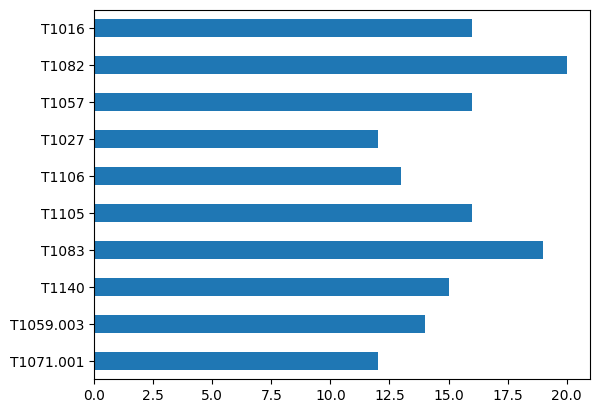

In [49]:
# finding most common TTPs across events with a certain tag
TAG = "giffgaff:software-research"
# get all events in MISP instance
all = misp.search(controller="events")
# create dictionary containing MITRE ATT&CK TTPs mapped to a count
ttps = {
    "T1548" : 0,
    "T1548.002" : 0,
    "T1548.004" : 0,
    "T1548.001" : 0,
    "T1548.003" : 0,
    "T1134" : 0,
    "T1134.002" : 0,
    "T1134.003" : 0,
    "T1134.004" : 0,
    "T1134.005" : 0,
    "T1134.001" : 0,
    "T1531" : 0,
    "T1087" : 0,
    "T1087.004" : 0,
    "T1087.002" : 0,
    "T1087.003" : 0,
    "T1087.001" : 0,
    "T1098" : 0,
    "T1098.001" : 0,
    "T1098.003" : 0,
    "T1098.002" : 0,
    "T1098.005" : 0,
    "T1098.004" : 0,
    "T1650" : 0,
    "T1583" : 0,
    "T1583.005" : 0,
    "T1583.002" : 0,
    "T1583.001" : 0,
    "T1583.008" : 0,
    "T1583.004" : 0,
    "T1583.007" : 0,
    "T1583.003" : 0,
    "T1583.006" : 0,
    "T1595" : 0,
    "T1595.001" : 0,
    "T1595.002" : 0,
    "T1595.003" : 0,
    "T1557" : 0,
    "T1557.002" : 0,
    "T1557.003" : 0,
    "T1557.001" : 0,
    "T1071" : 0,
    "T1071.004" : 0,
    "T1071.002" : 0,
    "T1071.003" : 0,
    "T1071.001" : 0,
    "T1010" : 0,
    "T1560" : 0,
    "T1560.003" : 0,
    "T1560.002" : 0,
    "T1560.001" : 0,
    "T1123" : 0,
    "T1119" : 0,
    "T1020" : 0,
    "T1020.001" : 0,
    "T1197" : 0,
    "T1547" : 0,
    "T1547.014" : 0,
    "T1547.002" : 0,
    "T1547.006" : 0,
    "T1547.008" : 0,
    "T1547.015" : 0,
    "T1547.010" : 0,
    "T1547.012" : 0,
    "T1547.007" : 0,
    "T1547.001" : 0,
    "T1547.005" : 0,
    "T1547.009" : 0,
    "T1547.003" : 0,
    "T1547.004" : 0,
    "T1547.013" : 0,
    "T1037" : 0,
    "T1037.002" : 0,
    "T1037.001" : 0,
    "T1037.003" : 0,
    "T1037.004" : 0,
    "T1037.005" : 0,
    "T1176" : 0,
    "T1217" : 0,
    "T1185" : 0,
    "T1110" : 0,
    "T1110.004" : 0,
    "T1110.002" : 0,
    "T1110.001" : 0,
    "T1110.003" : 0,
    "T1612" : 0,
    "T1115" : 0,
    "T1651" : 0,
    "T1580" : 0,
    "T1538" : 0,
    "T1526" : 0,
    "T1619" : 0,
    "T1059" : 0,
    "T1059.002" : 0,
    "T1059.009" : 0,
    "T1059.007" : 0,
    "T1059.008" : 0,
    "T1059.001" : 0,
    "T1059.006" : 0,
    "T1059.004" : 0,
    "T1059.005" : 0,
    "T1059.003" : 0,
    "T1092" : 0,
    "T1586" : 0,
    "T1586.003" : 0,
    "T1586.002" : 0,
    "T1586.001" : 0,
    "T1554" : 0,
    "T1584" : 0,
    "T1584.005" : 0,
    "T1584.002" : 0,
    "T1584.001" : 0,
    "T1584.004" : 0,
    "T1584.007" : 0,
    "T1584.003" : 0,
    "T1584.006" : 0,
    "T1609" : 0,
    "T1613" : 0,
    "T1136" : 0,
    "T1136.003" : 0,
    "T1136.002" : 0,
    "T1136.001" : 0,
    "T1543" : 0,
    "T1543.001" : 0,
    "T1543.004" : 0,
    "T1543.002" : 0,
    "T1543.003" : 0,
    "T1555" : 0,
    "T1555.003" : 0,
    "T1555.001" : 0,
    "T1555.005" : 0,
    "T1555.002" : 0,
    "T1555.004" : 0,
    "T1485" : 0,
    "T1132" : 0,
    "T1132.002" : 0,
    "T1132.001" : 0,
    "T1486" : 0,
    "T1565" : 0,
    "T1565.003" : 0,
    "T1565.001" : 0,
    "T1565.002" : 0,
    "T1001" : 0,
    "T1001.001" : 0,
    "T1001.003" : 0,
    "T1001.002" : 0,
    "T1074" : 0,
    "T1074.001" : 0,
    "T1074.002" : 0,
    "T1030" : 0,
    "T1530" : 0,
    "T1602" : 0,
    "T1602.002" : 0,
    "T1602.001" : 0,
    "T1213" : 0,
    "T1213.003" : 0,
    "T1213.001" : 0,
    "T1213.002" : 0,
    "T1005" : 0,
    "T1039" : 0,
    "T1025" : 0,
    "T1622" : 0,
    "T1491" : 0,
    "T1491.002" : 0,
    "T1491.001" : 0,
    "T1140" : 0,
    "T1610" : 0,
    "T1587" : 0,
    "T1587.002" : 0,
    "T1587.003" : 0,
    "T1587.004" : 0,
    "T1587.001" : 0,
    "T1652" : 0,
    "T1006" : 0,
    "T1561" : 0,
    "T1561.001" : 0,
    "T1561.002" : 0,
    "T1484" : 0,
    "T1484.002" : 0,
    "T1484.001" : 0,
    "T1482" : 0,
    "T1189" : 0,
    "T1568" : 0,
    "T1568.003" : 0,
    "T1568.002" : 0,
    "T1568.001" : 0,
    "T1114" : 0,
    "T1114.003" : 0,
    "T1114.001" : 0,
    "T1114.002" : 0,
    "T1573" : 0,
    "T1573.002" : 0,
    "T1573.001" : 0,
    "T1499" : 0,
    "T1499.003" : 0,
    "T1499.004" : 0,
    "T1499.001" : 0,
    "T1499.002" : 0,
    "T1611" : 0,
    "T1585" : 0,
    "T1585.003" : 0,
    "T1585.002" : 0,
    "T1585.001" : 0,
    "T1546" : 0,
    "T1546.008" : 0,
    "T1546.009" : 0,
    "T1546.010" : 0,
    "T1546.011" : 0,
    "T1546.001" : 0,
    "T1546.015" : 0,
    "T1546.014" : 0,
    "T1546.012" : 0,
    "T1546.016" : 0,
    "T1546.006" : 0,
    "T1546.007" : 0,
    "T1546.013" : 0,
    "T1546.002" : 0,
    "T1546.005" : 0,
    "T1546.004" : 0,
    "T1546.003" : 0,
    "T1480" : 0,
    "T1480.001" : 0,
    "T1048" : 0,
    "T1048.002" : 0,
    "T1048.001" : 0,
    "T1048.003" : 0,
    "T1041" : 0,
    "T1011" : 0,
    "T1011.001" : 0,
    "T1052" : 0,
    "T1052.001" : 0,
    "T1567" : 0,
    "T1567.002" : 0,
    "T1567.001" : 0,
    "T1567.003" : 0,
    "T1190" : 0,
    "T1203" : 0,
    "T1212" : 0,
    "T1211" : 0,
    "T1068" : 0,
    "T1210" : 0,
    "T1133" : 0,
    "T1008" : 0,
    "T1083" : 0,
    "T1222" : 0,
    "T1222.002" : 0,
    "T1222.001" : 0,
    "T1495" : 0,
    "T1187" : 0,
    "T1606" : 0,
    "T1606.002" : 0,
    "T1606.001" : 0,
    "T1592" : 0,
    "T1592.004" : 0,
    "T1592.003" : 0,
    "T1592.001" : 0,
    "T1592.002" : 0,
    "T1589" : 0,
    "T1589.001" : 0,
    "T1589.002" : 0,
    "T1589.003" : 0,
    "T1590" : 0,
    "T1590.002" : 0,
    "T1590.001" : 0,
    "T1590.005" : 0,
    "T1590.006" : 0,
    "T1590.004" : 0,
    "T1590.003" : 0,
    "T1591" : 0,
    "T1591.002" : 0,
    "T1591.001" : 0,
    "T1591.003" : 0,
    "T1591.004" : 0,
    "T1615" : 0,
    "T1200" : 0,
    "T1564" : 0,
    "T1564.008" : 0,
    "T1564.005" : 0,
    "T1564.001" : 0,
    "T1564.002" : 0,
    "T1564.003" : 0,
    "T1564.004" : 0,
    "T1564.010" : 0,
    "T1564.009" : 0,
    "T1564.006" : 0,
    "T1564.007" : 0,
    "T1574" : 0,
    "T1574.012" : 0,
    "T1574.001" : 0,
    "T1574.002" : 0,
    "T1574.004" : 0,
    "T1574.006" : 0,
    "T1574.005" : 0,
    "T1574.013" : 0,
    "T1574.007" : 0,
    "T1574.008" : 0,
    "T1574.009" : 0,
    "T1574.010" : 0,
    "T1574.011" : 0,
    "T1562" : 0,
    "T1562.008" : 0,
    "T1562.002" : 0,
    "T1562.007" : 0,
    "T1562.004" : 0,
    "T1562.001" : 0,
    "T1562.010" : 0,
    "T1562.003" : 0,
    "T1562.006" : 0,
    "T1562.009" : 0,
    "T1562.011" : 0,
    "T1525" : 0,
    "T1070" : 0,
    "T1070.003" : 0,
    "T1070.002" : 0,
    "T1070.008" : 0,
    "T1070.007" : 0,
    "T1070.009" : 0,
    "T1070.001" : 0,
    "T1070.004" : 0,
    "T1070.005" : 0,
    "T1070.006" : 0,
    "T1202" : 0,
    "T1105" : 0,
    "T1490" : 0,
    "T1056" : 0,
    "T1056.004" : 0,
    "T1056.002" : 0,
    "T1056.001" : 0,
    "T1056.003" : 0,
    "T1559" : 0,
    "T1559.001" : 0,
    "T1559.002" : 0,
    "T1559.003" : 0,
    "T1534" : 0,
    "T1570" : 0,
    "T1036" : 0,
    "T1036.007" : 0,
    "T1036.001" : 0,
    "T1036.008" : 0,
    "T1036.004" : 0,
    "T1036.005" : 0,
    "T1036.003" : 0,
    "T1036.002" : 0,
    "T1036.006" : 0,
    "T1556" : 0,
    "T1556.001" : 0,
    "T1556.007" : 0,
    "T1556.006" : 0,
    "T1556.004" : 0,
    "T1556.008" : 0,
    "T1556.002" : 0,
    "T1556.003" : 0,
    "T1556.005" : 0,
    "T1578" : 0,
    "T1578.002" : 0,
    "T1578.001" : 0,
    "T1578.003" : 0,
    "T1578.004" : 0,
    "T1112" : 0,
    "T1601" : 0,
    "T1601.002" : 0,
    "T1601.001" : 0,
    "T1111" : 0,
    "T1621" : 0,
    "T1104" : 0,
    "T1106" : 0,
    "T1599" : 0,
    "T1599.001" : 0,
    "T1498" : 0,
    "T1498.001" : 0,
    "T1498.002" : 0,
    "T1046" : 0,
    "T1135" : 0,
    "T1040" : 0,
    "T1095" : 0,
    "T1571" : 0,
    "T1003" : 0,
    "T1003.008" : 0,
    "T1003.005" : 0,
    "T1003.006" : 0,
    "T1003.004" : 0,
    "T1003.001" : 0,
    "T1003.003" : 0,
    "T1003.007" : 0,
    "T1003.002" : 0,
    "T1027" : 0,
    "T1027.001" : 0,
    "T1027.010" : 0,
    "T1027.004" : 0,
    "T1027.007" : 0,
    "T1027.009" : 0,
    "T1027.011" : 0,
    "T1027.006" : 0,
    "T1027.005" : 0,
    "T1027.002" : 0,
    "T1027.003" : 0,
    "T1027.008" : 0,
    "T1588" : 0,
    "T1588.003" : 0,
    "T1588.004" : 0,
    "T1588.005" : 0,
    "T1588.001" : 0,
    "T1588.002" : 0,
    "T1588.006" : 0,
    "T1137" : 0,
    "T1137.006" : 0,
    "T1137.001" : 0,
    "T1137.002" : 0,
    "T1137.003" : 0,
    "T1137.004" : 0,
    "T1137.005" : 0,
    "T1201" : 0,
    "T1120" : 0,
    "T1069" : 0,
    "T1069.003" : 0,
    "T1069.002" : 0,
    "T1069.001" : 0,
    "T1566" : 0,
    "T1598" : 0,
    "T1598.002" : 0,
    "T1598.003" : 0,
    "T1598.001" : 0,
    "T1566.001" : 0,
    "T1566.002" : 0,
    "T1566.003" : 0,
    "T1647" : 0,
    "T1542" : 0,
    "T1542.003" : 0,
    "T1542.002" : 0,
    "T1542.004" : 0,
    "T1542.001" : 0,
    "T1542.005" : 0,
    "T1057" : 0,
    "T1055" : 0,
    "T1055.004" : 0,
    "T1055.001" : 0,
    "T1055.011" : 0,
    "T1055.015" : 0,
    "T1055.002" : 0,
    "T1055.009" : 0,
    "T1055.013" : 0,
    "T1055.012" : 0,
    "T1055.008" : 0,
    "T1055.003" : 0,
    "T1055.005" : 0,
    "T1055.014" : 0,
    "T1572" : 0,
    "T1090" : 0,
    "T1090.004" : 0,
    "T1090.002" : 0,
    "T1090.001" : 0,
    "T1090.003" : 0,
    "T1012" : 0,
    "T1620" : 0,
    "T1219" : 0,
    "T1563" : 0,
    "T1563.002" : 0,
    "T1563.001" : 0,
    "T1021" : 0,
    "T1021.007" : 0,
    "T1021.003" : 0,
    "T1021.001" : 0,
    "T1021.002" : 0,
    "T1021.004" : 0,
    "T1021.005" : 0,
    "T1021.006" : 0,
    "T1018" : 0,
    "T1091" : 0,
    "T1496" : 0,
    "T1207" : 0,
    "T1014" : 0,
    "T1053" : 0,
    "T1053.002" : 0,
    "T1053.007" : 0,
    "T1053.003" : 0,
    "T1053.005" : 0,
    "T1053.006" : 0,
    "T1029" : 0,
    "T1113" : 0,
    "T1597" : 0,
    "T1597.002" : 0,
    "T1597.001" : 0,
    "T1596" : 0,
    "T1596.004" : 0,
    "T1596.001" : 0,
    "T1596.003" : 0,
    "T1596.005" : 0,
    "T1596.002" : 0,
    "T1593" : 0,
    "T1593.003" : 0,
    "T1593.002" : 0,
    "T1593.001" : 0,
    "T1594" : 0,
    "T1505" : 0,
    "T1505.004" : 0,
    "T1505.001" : 0,
    "T1505.005" : 0,
    "T1505.002" : 0,
    "T1505.003" : 0,
    "T1648" : 0,
    "T1489" : 0,
    "T1129" : 0,
    "T1072" : 0,
    "T1518" : 0,
    "T1518.001" : 0,
    "T1608" : 0,
    "T1608.004" : 0,
    "T1608.003" : 0,
    "T1608.005" : 0,
    "T1608.006" : 0,
    "T1608.001" : 0,
    "T1608.002" : 0,
    "T1528" : 0,
    "T1539" : 0,
    "T1649" : 0,
    "T1558" : 0,
    "T1558.004" : 0,
    "T1558.001" : 0,
    "T1558.003" : 0,
    "T1558.002" : 0,
    "T1553" : 0,
    "T1553.002" : 0,
    "T1553.006" : 0,
    "T1553.001" : 0,
    "T1553.004" : 0,
    "T1553.005" : 0,
    "T1553.003" : 0,
    "T1195" : 0,
    "T1195.003" : 0,
    "T1195.001" : 0,
    "T1195.002" : 0,
    "T1218" : 0,
    "T1218.003" : 0,
    "T1218.001" : 0,
    "T1218.002" : 0,
    "T1218.004" : 0,
    "T1218.014" : 0,
    "T1218.013" : 0,
    "T1218.005" : 0,
    "T1218.007" : 0,
    "T1218.008" : 0,
    "T1218.009" : 0,
    "T1218.010" : 0,
    "T1218.011" : 0,
    "T1218.012" : 0,
    "T1082" : 0,
    "T1614" : 0,
    "T1614.001" : 0,
    "T1016" : 0,
    "T1016.001" : 0,
    "T1049" : 0,
    "T1033" : 0,
    "T1216" : 0,
    "T1216.001" : 0,
    "T1007" : 0,
    "T1569" : 0,
    "T1569.001" : 0,
    "T1569.002" : 0,
    "T1529" : 0,
    "T1124" : 0,
    "T1080" : 0,
    "T1221" : 0,
    "T1205" : 0,
    "T1205.001" : 0,
    "T1205.002" : 0,
    "T1537" : 0,
    "T1127" : 0,
    "T1127.001" : 0,
    "T1199" : 0,
    "T1552" : 0,
    "T1552.003" : 0,
    "T1552.008" : 0,
    "T1552.005" : 0,
    "T1552.007" : 0,
    "T1552.001" : 0,
    "T1552.002" : 0,
    "T1552.006" : 0,
    "T1552.004" : 0,
    "T1535" : 0,
    "T1550" : 0,
    "T1550.001" : 0,
    "T1550.002" : 0,
    "T1550.003" : 0,
    "T1550.004" : 0,
    "T1204" : 0,
    "T1204.002" : 0,
    "T1204.003" : 0,
    "T1204.001" : 0,
    "T1078" : 0,
    "T1078.004" : 0,
    "T1078.001" : 0,
    "T1078.002" : 0,
    "T1078.003" : 0,
    "T1125" : 0,
    "T1497" : 0,
    "T1497.001" : 0,
    "T1497.003" : 0,
    "T1497.002" : 0,
    "T1600" : 0,
    "T1600.002" : 0,
    "T1600.001" : 0,
    "T1102" : 0,
    "T1102.002" : 0,
    "T1102.001" : 0,
    "T1102.003" : 0,
    "T1047" : 0,
    "T1220" : 0,
    }



# loop through all events and increase count of a TTP in dictionary if an event has that TTP
for i in all:
    # check for a specific TAG
    for tag in i['Event']['Tag']:
        if tag['name'] == TAG:
            galaxies = i['Event']['Galaxy']
        else:
            continue
        for j in galaxies:
            if j['type'] == 'mitre-attack-pattern':
                for k in j['GalaxyCluster']:
                    ttp = k['meta']['external_id'][0]
                    if ttp in ttps:
                        ttps[ttp] += 1

# print TTPs that have a count above 0
# for k, v in ttps.items():
#     if v > 0:
#         print(k, v)

# plotting data
ttps_data = pd.Series(data=ttps, index=list(ttps.keys()))


(ttps_data
    [lambda s: s>11]
    .plot.barh()
)

### Show Statistics

- Prints data about MISP, such as users, tags, and attributes

In [1]:
def general_statistics():
    res = misp.users_statistics()
    print("--- General Stats ---")
    print(f"Users: {res['stats']['user_count']}")
    print(f"Events: {res['stats']['event_count']}")
    print(f"- added this month: {res['stats']['event_count_month']}")
    print(f"Attributes: {res['stats']['attribute_count']}")
    print(f"- added this month: {res['stats']['attribute_count_month']}")
    print()


def tag_statistics():
    res = misp.tags_statistics()
    print("--- Tag Stats ---")
    print(f"Threat Intelligence Articles: " + res['tags']['cssa:origin="report"'])
    print(f"Manual Investigations: " + res['tags']['cssa:origin="manual_investigation"'])
    print(f"HackerOne Reports: " + res['tags']['hackerone:report'])
    print(f"Purple Team Exercises: " + res['tags']['giffgaff:purple-team-exercise'])
    print()

def attribute_statistics():
    res = misp.attributes_statistics()
    print("--- Attribute Stats ---")
    values_all = list(res.values())
    total_all = 0 
    for i in values_all:
        total_all += int(i)
    print(f"Total: {total_all}")

    total_endpoint = int(res['md5']) + int(res['sha1']) + int(res['sha256']) 
    print(f"Endpoint Indicators: {total_endpoint}")
    print(f"- MD5 hash: {res['md5']}")
    print(f"- SHA1 hash: {res['sha1']}")
    print(f"- SHA256 hash: {res['sha256']}")

    totaL_network = int(res['domain']) + int(res['ip-dst']) + int(res['hostname']) + int(res['url']) + int(res['email-src'])
    print(f"Network Indicators: {totaL_network}")
    print(f"- domains: {res['domain']}")
    print(f"- ip addresses: {res['ip-dst']}")
    print(f"- hostnames: {res['hostname']}")
    print(f"- URLs: {res['url']}")
    print(f"- email address: {res['email-src']}")

print("=" * 25)
print("=== MISP Statistics ===")
print("=" * 25)
print()
general_statistics()
tag_statistics()
attribute_statistics()
print()





=== MISP Statistics ===



NameError: name 'misp' is not defined

### Get a list of IOCs (attributes) from MISP which can be added to an IDS systems to block/alert

CrowdStrike:
- script `iocs-from-misp-to-cs.py` takes MISP attributes, converts them to CrowdStrike Indicators, and uploads them to CrowdStrike Falcon
- it uses the MISP and CrowdStrike APIs
- the script below is a function from that script which shows you the indicators to be uploaded to CrowdStrike

Alert Logic:
- not possible

Imperva:
- potentially possible but controlled by SRE / tooling team so don't have access

In [74]:
from validators import ip_address

def GetMispAttributes(misp_url, misp_key, misp_verifycert):
    # authenticate to misp 
    misp = PyMISP(misp_url, misp_key, misp_verifycert, debug=False)

    # get all IOCs with IDS flag set to true and publixhed in last 89 days
    #attributes = misp.search(controller='attributes', to_ids=1, pythonify=True)
    attributes = misp.search(controller='attributes', to_ids=1, pythonify=True, publish_timestamp='89d')

    # add IOCs to bucket
    ipv4 = []
    ipv6 = []
    domain = []
    url = []
    hostname = []
    sha256 = []
    md5 = []
    sha1 = []
    other = []

    for i in attributes:
        if (i.type == "ip-dst"):
            # check if IPv4 or IPv6
            if (ip_address.ipv4(i.value)):
                ipv4.append(i.value)
            elif (ip_address.ipv6(i.value)):
                ipv6.append(i.value)
            else:
                other.append(i.value)
        elif (i.type == "ip-dst|port"):
            addr = ipv4.append(i.value.split('|')[0])
            # check if IPv4 or IPv6
            if (ip_address.ipv4(addr)):
                ipv4.append(addr)
            elif (ip_address.ipv6(addr)):
                ipv6.append(addr)
            else:
                other.append(addr)
        elif (i.type == "domain"):
            domain.append(i.value)
        elif (i.type == "domain|ip"):
            # split domain an ip, append to respective lists
            domain.append(i.value.split('|')[0])
            addr = ipv4.append(i.value.split('|')[1])
            # check if IPv4 or IPv6
            if (ip_address.ipv4(addr)):
                ipv4.append(addr)
            elif (ip_address.ipv6(addr)):
                ipv6.append(addr)
            else:
                other.append(addr)
        elif (i.type == "url"):
            url.append(i.value)
        elif (i.type == "hostname"):
            hostname.append(i.value)
        elif (i.type == "hostname|port"):
            # split hostand and port
            hostname.append(i.value.split('|')[0])
        elif (i.type == "sha256"):
            sha256.append(i.value)
        elif (i.type == "filename|sha256"):
            # split filename and hash, append hash to sha256 list
            sha256.append(i.value.split('|')[1])
        elif (i.type == "md5"):
            md5.append(i.value)
        elif (i.type == "filename|md5"):
            # split filename and hash, append hash to md5 list
            md5.append(i.value.split('|')[1])
        elif (i.type == "sha1"):
            sha1.append(i.value)
        elif (i.type == "filename|sha1"):
            # split filename and hash, append hash to sha1 list
            sha1.append(i.value.split('|')[1])
        else:
            other.append(i.value)

    ipv4_length = len(ipv4)
    ipv6_length = len(ipv6)
    domain_length = len(domain)
    url_length = len(url)
    hostname_length = len(hostname)
    sha256_length = len(sha256)
    sha1_length = len(sha1)
    md5_length = len(md5)


    # print totals
    print(f"[+] Total MISP indicators: {ipv4_length + ipv6_length + domain_length + url_length + hostname_length + sha256_length + sha1_length + md5_length}")
    print(f"+++ Network Indicators +++ ")
    print(f"- IPv4 addresses: {ipv4_length}")
    print(f"- IPv6 addresses: {ipv6_length}")
    print(f"- Domains: {domain_length}")
    print(f"- URLs: {url_length}")
    print(f"- Hostnames: {hostname_length}")
    print(f"+++ Endpoint Indicators +++")
    print(f"- SHA256 hashes: {sha256_length}")
    print(f"- SHA1 hashes: {sha1_length}")
    print(f"- MD5 hashes: {md5_length}")
    print(f"[+] Total \"other\" IOCs: {len(other)}")
    print(f"[+] Total indicators to upload to CrowdStrike: {ipv4_length + ipv6_length + sha256_length + md5_length + domain_length}")

    # return indicators list (tuple of type and value)
    cs_indicators = {
        "ipv4": ipv4,
        "ipv6": ipv6,
        "domain": domain,
        "sha256": sha256,
        "md5": md5,
    }
    return cs_indicators


indicators = GetMispAttributes(MISP_URL, MISP_KEY, MISP_VERIFYCERT)
#pprint(indicators)

/Users/adam.goss/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host '3.249.168.138'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/adam.goss/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host '3.249.168.138'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/adam.goss/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host '3.249.168.138'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ada

[+] Total MISP indicators: 619
+++ Network Indicators +++ 
- IPv4 addresses: 78
- IPv6 addresses: 0
- Domains: 158
- URLs: 18
- Hostnames: 57
+++ Endpoint Indicators +++
- SHA256 hashes: 143
- SHA1 hashes: 76
- MD5 hashes: 89
[+] Total "other" IOCs: 2
[+] Total indicators to upload to CrowdStrike: 468
